In [ ]:
!pip install tensorflow

import tensorflow as tf
from tensorflow.keras.utils import to_categoric

# pythonファイルから持ってきました
from double_digits import load_double_data

In [ ]:
# データのロードと前処理
# 2桁のデータを読み込む、学習データが90000、テストデータが10000
(train_images, train_labels), (test_images, test_labels) = load_double_data()

# データのスケーリング(0～1で正規化)
# 桁ごとに分けて分類するので0~9の10クラスのみでよい
train_images, test_images = train_images / 255.0, test_images / 255.0
train_labels = to_categorical(train_labels, 10)
test_labels = to_categorical(test_labels, 10)

# train_numとtest_numは学習データ、テストデータの数を表す。未実装
train_images = train_images.reshape((train_num, 28, 28, 1))
test_images = test_images.reshape((test_num, 28, 28, 1))

# ラベルをone-hotエンコーディング（例：5 → [0,0,0,0,0,1,0,0,0,0]）
train_labels = to_categorical(train_labels, 10)
test_labels = to_categorical(test_labels, 10)

def baseline_model():
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.Flatten())
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(10, activation='softmax'))
    return model

baseline_model = baseline_model()
baseline_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
baseline_history = baseline_model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

# 畳み込み層の追加
def improved_model_1():
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.Conv2D(128, (3, 3), activation='relu'))  # 追加
    model.add(layers.Flatten())
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(10, activation='softmax'))
    return model

# モデルのコンパイルと学習
improved_model_1 = improved_model_1()
improved_model_1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
improved_history_1 = improved_model_1.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

# ドロップアウトの追加
def improved_model_2():
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.Flatten())
    model.add(layers.Dropout(0.5))  # 追加
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(10, activation='softmax'))
    return model

# モデルのコンパイルと学習
improved_model_2 = improved_model_2()
improved_model_2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
improved_history_2 = improved_model_2.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

In [ ]:
#ベースラインモデルの予測
baseline_predictions = baseline_model.predict(test_images)

313/313 [==============================] - 3s 10ms/step


In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import numpy as np
# ベースラインモデルの正確性
baseline_accuracy = accuracy_score(np.argmax(test_labels, axis=1), np.argmax(baseline_predictions, axis=1))
print("ベースラインモデルの正確性:", baseline_accuracy)

# 混同行列
baseline_conf_matrix = confusion_matrix(np.argmax(test_labels, axis=1), np.argmax(baseline_predictions, axis=1))
print("混同行列:\n", baseline_conf_matrix)

# 適合率、再現率、F1スコア
print(classification_report(np.argmax(test_labels, axis=1), np.argmax(baseline_predictions, axis=1)))


ベースラインモデルの正確性: 0.7157
混同行列:
 [[728  14  27  25  33   2  10  16 113  32]
 [ 14 821   6   8   6   8   9   6  37  85]
 [ 77   8 546  68 119  44  56  56  15  11]
 [ 26  11  64 568  92 115  53  41  17  13]
 [ 16   1  50  49 717  18  50  82  13   4]
 [ 21   4  46 230  61 539  27  54  15   3]
 [  3   8  43  61  37  23 789  18  14   4]
 [ 12   2  23  32  69  46   9 793   3  11]
 [ 42  25   7  15  10   4   6   4 860  27]
 [ 24  66  10  17   6  13   8  21  39 796]]
              precision    recall  f1-score   support

           0       0.76      0.73      0.74      1000
           1       0.86      0.82      0.84      1000
           2       0.66      0.55      0.60      1000
           3       0.53      0.57      0.55      1000
           4       0.62      0.72      0.67      1000
           5       0.66      0.54      0.59      1000
           6       0.78      0.79      0.78      1000
           7       0.73      0.79      0.76      1000
           8       0.76      0.86      0.81      1000

In [ ]:
model_1_predictions = improved_model_1.predict(test_images)

313/313 [==============================] - 4s 12ms/step


In [ ]:
model_1_accuracy = accuracy_score(np.argmax(test_labels, axis=1), np.argmax(model_1_predictions, axis=1))
print("改変モデルの正確性:", model_1_accuracy)

# 混同行列
model_1_conf_matrix = confusion_matrix(np.argmax(test_labels, axis=1), np.argmax(model_1_predictions, axis=1))
print("混同行列:\n", model_1_conf_matrix)

# 適合率、再現率、F1スコア
print(classification_report(np.argmax(test_labels, axis=1), np.argmax(model_1_predictions, axis=1)))

改変モデルの正確性: 0.7029
混同行列:
 [[779  37  46  11  23   2  15   4  50  33]
 [ 16 882   7   5   4   1  16   1  20  48]
 [ 76  12 610  42  98  44  80  15  11  12]
 [ 18  18  90 429  97 167 125  17  22  17]
 [ 14   7  98  30 694  26  80  33  14   4]
 [ 17  15  84 149  66 562  49  43  10   5]
 [  4   8  50  34  28  12 856   1   5   2]
 [ 11  12  59  41 120  61  21 637   6  32]
 [ 81  46  11  10  13   4  13   2 795  25]
 [ 26 104  11  10   4   5  20   4  31 785]]
              precision    recall  f1-score   support

           0       0.75      0.78      0.76      1000
           1       0.77      0.88      0.82      1000
           2       0.57      0.61      0.59      1000
           3       0.56      0.43      0.49      1000
           4       0.61      0.69      0.65      1000
           5       0.64      0.56      0.60      1000
           6       0.67      0.86      0.75      1000
           7       0.84      0.64      0.73      1000
           8       0.82      0.80      0.81      1000
   

In [ ]:
model_2_predictions = improved_model_2.predict(test_images)

313/313 [==============================] - 3s 10ms/step


In [ ]:
model_2_accuracy = accuracy_score(np.argmax(test_labels, axis=1), np.argmax(model_2_predictions, axis=1))
print("改変モデル2の正確性:", model_1_accuracy)

# 混同行列
model_2_conf_matrix = confusion_matrix(np.argmax(test_labels, axis=1), np.argmax(model_2_predictions, axis=1))
print("混同行列:\n", model_1_conf_matrix)

# 適合率、再現率、F1スコア
print(classification_report(np.argmax(test_labels, axis=1), np.argmax(model_2_predictions, axis=1)))

改変モデル2の正確性: 0.7029
混同行列:
 [[779  37  46  11  23   2  15   4  50  33]
 [ 16 882   7   5   4   1  16   1  20  48]
 [ 76  12 610  42  98  44  80  15  11  12]
 [ 18  18  90 429  97 167 125  17  22  17]
 [ 14   7  98  30 694  26  80  33  14   4]
 [ 17  15  84 149  66 562  49  43  10   5]
 [  4   8  50  34  28  12 856   1   5   2]
 [ 11  12  59  41 120  61  21 637   6  32]
 [ 81  46  11  10  13   4  13   2 795  25]
 [ 26 104  11  10   4   5  20   4  31 785]]
              precision    recall  f1-score   support

           0       0.75      0.75      0.75      1000
           1       0.78      0.87      0.82      1000
           2       0.60      0.65      0.63      1000
           3       0.61      0.41      0.49      1000
           4       0.66      0.63      0.65      1000
           5       0.60      0.64      0.62      1000
           6       0.73      0.82      0.77      1000
           7       0.73      0.79      0.76      1000
           8       0.83      0.83      0.83      1000
  

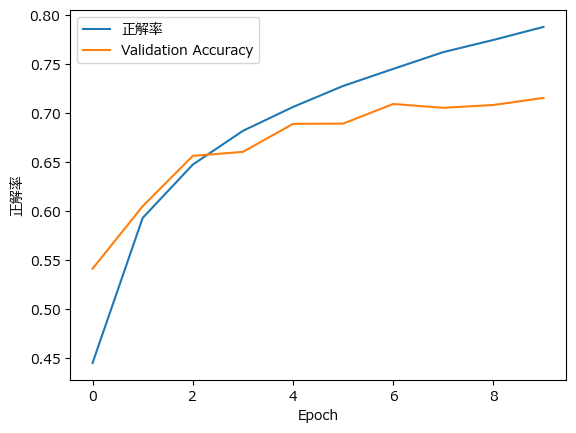

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
fp = FontProperties(fname=r'C:\WINDOWS\Fonts\meiryo.ttc', size=10)
plt.rcParams['font.family'] = 'Meiryo'#文字化け防止
#学習曲線の可視化
plt.plot(baseline_history.history['accuracy'], label='正解率')
plt.plot(baseline_history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('正解率')
plt.legend()
plt.show()

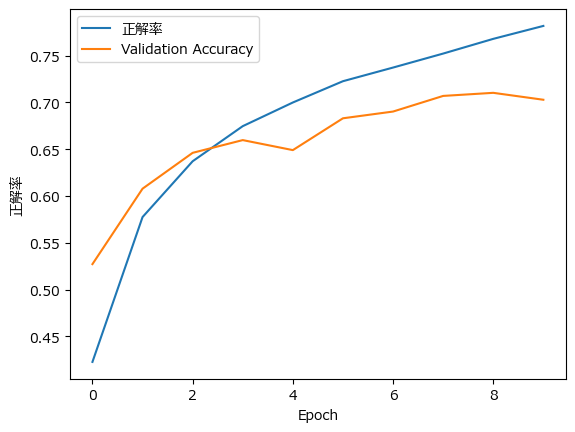

In [ ]:
plt.plot(improved_history_1.history['accuracy'], label='正解率')
plt.plot(improved_history_1.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('正解率')
plt.legend()
plt.show()

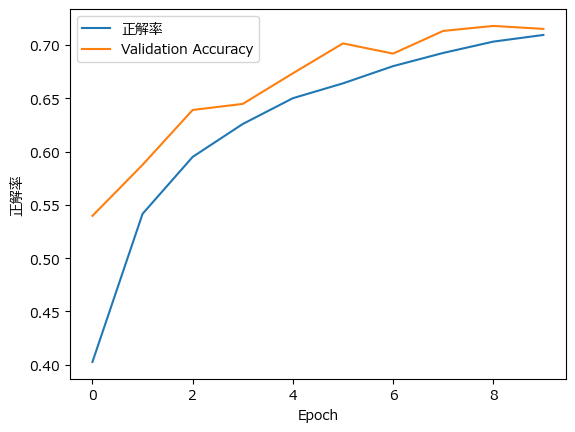

In [ ]:
plt.plot(improved_history_2.history['accuracy'], label='正解率')
plt.plot(improved_history_2.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('正解率')
plt.legend()
plt.show()

In [ ]:
#以上をみると、層の数をふやすとあまり結果に差はないが、ドロップアウトを追加すると、正解率が上がった